In [1]:
import numpy as np 

import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

dts = pd.read_csv("/content/Iris.csv")

dts.info()

dts.drop('Id',axis=1,inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [2]:
dts.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


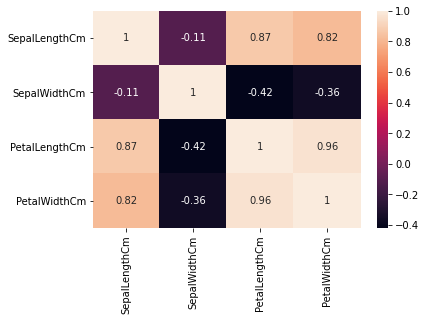

In [3]:
ax = sns.heatmap(dts.corr(), annot=True)

In [4]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']


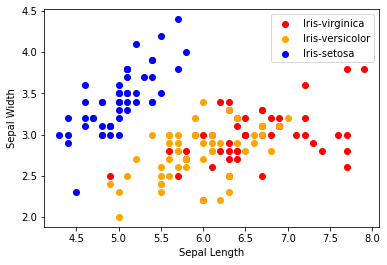

In [5]:
for i in range(3):
    x = dts[dts['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()


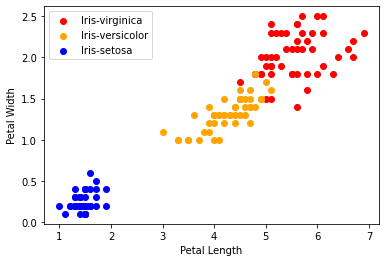

In [6]:
for i in range(3):
    x = dts[dts['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()


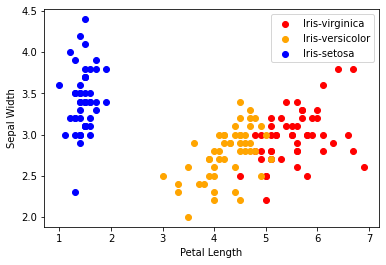

In [7]:
for i in range(3):
    x = dts[dts['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Sepal Width")
plt.legend()


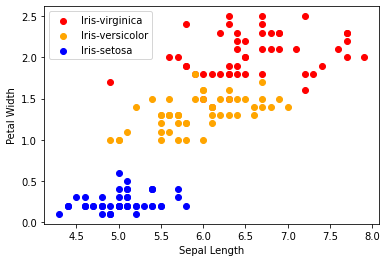

In [8]:
for i in range(3):
    x = dts[dts['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.legend()


In [9]:
dts.head(10)
mp = {'Iris-virginica': 1 ,'Iris-versicolor': 2 ,'Iris-setosa': 3}



In [10]:
dts['Species']=dts['Species'].map(mp)

In [11]:
dts.head(100)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,3
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,2
96,5.7,2.9,4.2,1.3,2
97,6.2,2.9,4.3,1.3,2
98,5.1,2.5,3.0,1.1,2


In [12]:
from sklearn.model_selection import train_test_split

X = dts.drop(columns=['Species'])
Y = dts['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)


In [14]:
model = LogisticRegression()

In [15]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
model.score(x_test,y_test)*100

93.33333333333333

In [17]:
model = KNeighborsClassifier()

model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
model.score(x_test,y_test)*100

93.33333333333333

In [19]:
dts.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,3


In [22]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)

acc_decision_tree


93.33